# Fake News Detector

### Alex Hedrick

### About the data (downloaded from Kaggle):

(WELFake) is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. For this, authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training.

Published in:
IEEE Transactions on Computational Social Systems: pp. 1-13 (doi: 10.1109/TCSS.2021.3068519).

0 = fake, 1 = real

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
%matplotlib inline
import nltk

# read data
news = pd.read_csv('news_data_2_recent/WELFake_Dataset.csv', sep=',', names = ['index','title','body','label'], header = None, skiprows = 1)
news = news.drop('index', axis=1)
news.head()

,title,body,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


### Data Preprocessing

In [2]:
import string
from warnings import simplefilter
import time
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
start_time = time.time()

# remove all rows with missing values
news = news.dropna()
print('removed missing values in ' + str(np.round(time.time() - start_time,2)) + ' seconds')

# remove rows that don't have a label
news = news[news['label'].isin([0,1])]
print('removed rows without a label in ' + str(np.round(time.time() - start_time,2)) + ' seconds')

# define set of allowed characters
allowed_chars = set(string.ascii_letters + string.digits + ' ')

# remove non-alphanumeric characters from news
news['title'] = news['title'].apply(lambda x: ''.join(c for c in x if c in allowed_chars))
news['body'] = news['body'].apply(lambda x: ''.join(c for c in x if c in allowed_chars))
print('removed non-alphanumeric characters in ' + str(np.round(time.time() - start_time,2)) + ' seconds')

# convert all news to lowercase
news['title'] = news['title'].str.lower()
news['body'] = news['body'].str.lower()
print('converted to lowercase in ' + str(np.round(time.time() - start_time,2)) + ' seconds')

# # lemmatize news
# lemmatizer = nltk.stem.WordNetLemmatizer()
# news['title'] = news['title'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)))
# news['body'] = news['body'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)))

# # stem news
# from nltk.stem.porter import PorterStemmer
# stemmer = PorterStemmer()
# # news['title'] = news['title'].apply(lambda x: ' '.join(stemmer.stem(word) for word in nltk.word_tokenize(x)))
# news['body'] = news['body'].apply(lambda x: ' '.join(stemmer.stem(word) for word in nltk.word_tokenize(x)))
# print('stemmed in ' + str(np.round(time.time() - start_time,2)) + ' seconds')

# replace 0 with -1 for label
# now, 1 = fake news, -1 = real news
news['label'] = news['label'].replace(0, -1)

news.head()


removed missing values in 0.03 seconds
removed rows without a label in 0.04 seconds
removed non-alphanumeric characters in 14.8 seconds
converted to lowercase in 15.02 seconds


,title,body,label
0,law enforcement on high alert following threat...,no comment is expected from barack obama membe...,1
2,unbelievable obamas attorney general says most...,now most of the demonstrators gathered last n...,1
3,bobby jindal raised hindu uses story of christ...,a dozen politically active pastors came here f...,-1
4,satan 2 russia unvelis an image of its terrify...,the rs28 sarmat missile dubbed satan 2 will re...,1
5,about time christian group sues amazon and spl...,all we can say on this one is it s about time ...,1


### Data Visualization

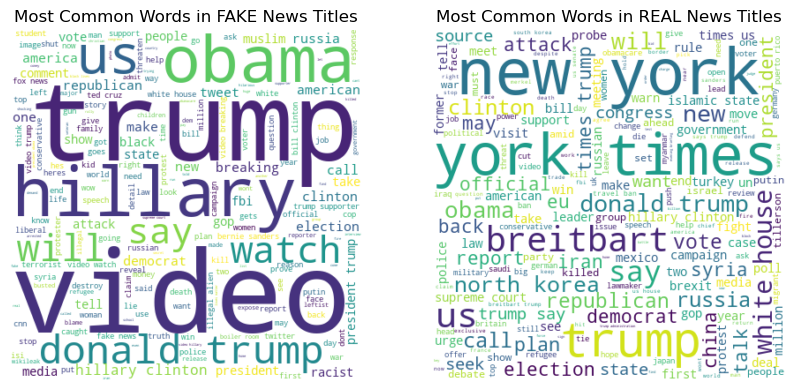

In [3]:
# most common words in news titles

# filter news by label 1
news_label1 = news[news['label'] == 1]

# filter news by label -1
news_labelminus1 = news[news['label'] == -1]

# set up stopwords
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(["s", "wa", "u", "ha"])

# create WordCloud for label 1
title_words_label1 = ' '.join(news_label1['title'])
title_wordcloud_label1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(title_words_label1)

# create WordCloud for label -1
title_words_labelminus1 = ' '.join(news_labelminus1['title'])
title_wordcloud_labelminus1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(title_words_labelminus1)

# plot the two WordClouds side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(title_wordcloud_label1, interpolation='bilinear')
ax[0].set_title('Most Common Words in FAKE News Titles')
ax[0].axis('off')
ax[1].imshow(title_wordcloud_labelminus1, interpolation='bilinear')
ax[1].set_title('Most Common Words in REAL News Titles')
ax[1].axis('off')
plt.show()


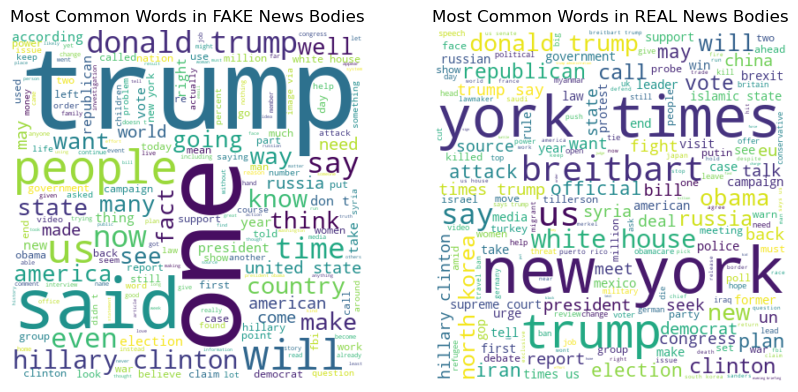

In [4]:
# most common words in news bodies
# note: must run cell that creates news_label1 and news_labelminus1 first

# create WordCloud for label 1
body_words_label1 = ' '.join(news_label1['body'])
body_wordcloud_label1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(body_words_label1)

# create WordCloud for label -1
body_words_labelminus1 = ' '.join(news_labelminus1['title'])
body_wordcloud_labelminus1 = WordCloud(width=400, height=400, stopwords=stopwords, background_color='white').generate(body_words_labelminus1)

# plot the two WordClouds side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(body_wordcloud_label1, interpolation='bilinear')
ax[0].set_title('Most Common Words in FAKE News Bodies')
ax[0].axis('off')
ax[1].imshow(body_wordcloud_labelminus1, interpolation='bilinear')
ax[1].set_title('Most Common Words in REAL News Bodies')
ax[1].axis('off')
plt.show()


From these word clouds, we can clearly see that most of the articles, fake and real, are about politics. Therefore, the classifier will be better at classifying an article if it is about politics and likely will not accurately predict fake news about sports, science, or other topics.

Furthermore, there are clear differences between the word clouds. Hopefully, we can exploit these differences and create a classifier that can reasonably accurately classify whether an article is fake or not just by looking at how often the most common words appear in the title and body of the article.

### Generate Multinomial Features

Generate multinomial features based on the number of occurrences of the most common words in 'title' and 'body' using sklearn CountVectorizer

In [5]:
# generate multinomial features based on the number of occurrences of a set of words in the message using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text 

more_stop_words = ["s", "wa", "u", "ha"]
stop_words = text.ENGLISH_STOP_WORDS.union(more_stop_words)


xtrain, xvali, training_labels, vali_labels = train_test_split(news['body'], news['label'], test_size=0.33, random_state=1)


# return the number of unique words in all training data
# def get_unique_words_count(training_data):
#     unique_words = set()
#     for message in training_data:
#         for word in message.split():
#             unique_words.add(word)
#     return len(unique_words)

# print(f'number of unique words: {get_unique_words_count(xtrain)}')


# look at only most frequent m words
m = [5, 50, 30000, 40000, 50000]
# m = [1]

# initialize lists to hold training features and vali features
training_features = []
vali_features = []

# apply CountVectorizer to messages
for j in m:
    count_vectorizer = CountVectorizer(stop_words=stop_words, max_features=j)
    # count_vectorizer = CountVectorizer(stop_words=stop_words)

    # get count features for training data
    training_features_temp = count_vectorizer.fit_transform(xtrain)

    # get count features for vali data
    vali_features_temp = count_vectorizer.transform(xvali)

    # append training features to list
    training_features.append(training_features_temp)
    vali_features.append(vali_features_temp)

    # print time elapsed
    print(f'finished m = {j}')

# now we have a list of count features and feature names for each value of m
print(training_features[0].shape)
print(vali_features[0].shape)

finished m = 5
finished m = 50
finished m = 30000
finished m = 40000
finished m = 50000
(47929, 5)
(23608, 5)


### SKLearn Algorithms

I start with various SKLearn machine learning algorithm implementations because they are much faster than mine. I perform a number of trials to determine optimal prediction parameters then run these parameters on my own code.

#### SKLearn SVM

In [6]:
# from sklearn.svm import SVC

# # implement soft-margin SVM
# c = 0.01

# # use sklearn's svc to classify the datasets 
# # find separator
# clf = SVC(C=c, kernel='linear', class_weight='balanced')
# clf.fit(training_features[3], training_labels)

# # predictor and validation loss
# ysvm = clf.predict(vali_features[3])
# ysvm = np.int0(ysvm)

# print(classification_report(vali_labels, ysvm))

#### SKLearn Naive Bayes

m = 5
              precision    recall  f1-score   support

          -1       0.76      0.67      0.71     11515
           1       0.72      0.80      0.76     12093

    accuracy                           0.74     23608
   macro avg       0.74      0.74      0.74     23608
weighted avg       0.74      0.74      0.74     23608

m = 50
              precision    recall  f1-score   support

          -1       0.83      0.85      0.84     11515
           1       0.85      0.84      0.85     12093

    accuracy                           0.84     23608
   macro avg       0.84      0.84      0.84     23608
weighted avg       0.84      0.84      0.84     23608

m = 30000
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90     11515
           1       0.91      0.90      0.90     12093

    accuracy                           0.90     23608
   macro avg       0.90      0.90      0.90     23608
weighted avg       0.90      0.90      0.90     236

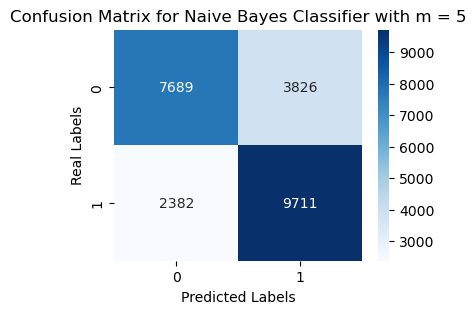

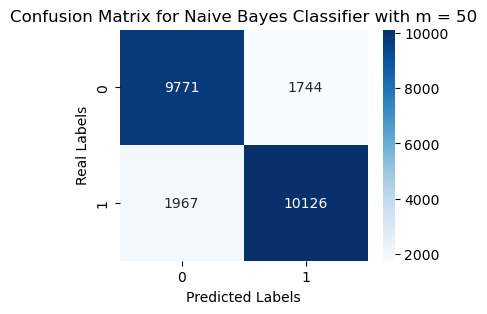

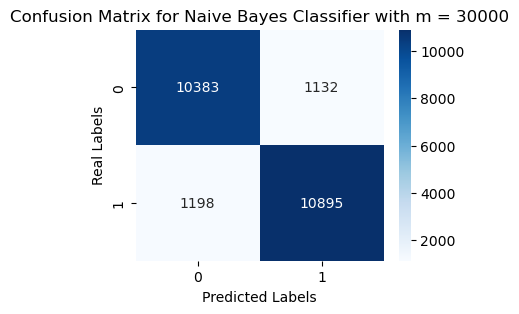

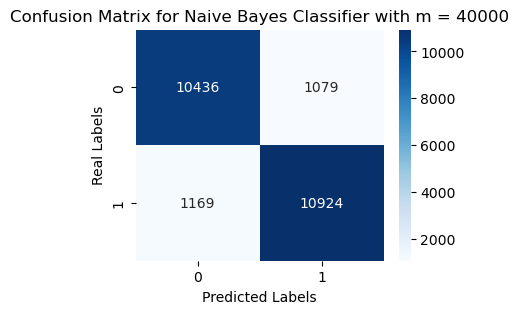

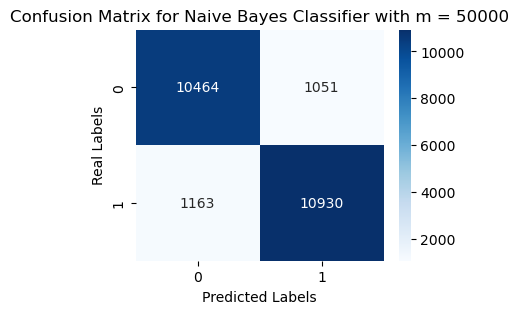

In [7]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

for i in range(len(m)):
    # classifier
    nb_classifier.fit(training_features[i], training_labels)

    # predictor
    ybayes = nb_classifier.predict(vali_features[i])

    # print classification report
    print(f'm = {m[i]}')
    print(classification_report(vali_labels, ybayes))

    # print confusion matrix
    plt.figure(figsize = (4,3))

    sns.heatmap(confusion_matrix(vali_labels,ybayes), annot=True, 
                fmt='', cmap='Blues')

    plt.title('Confusion Matrix for Naive Bayes Classifier with m = ' + str(m[i]))
    plt.xlabel('Predicted Labels')
    plt.ylabel('Real Labels')

#### SKLearn K-Nearest Neighbors

In [8]:
# from sklearn.neighbors import KNeighborsClassifier
# k = 1
# for i in range(len(m)):
#     knn = KNeighborsClassifier(n_neighbors = k)
#     knn.fit(training_features[i], training_labels)
#     print('Accuracy for m = ' + str(m[i]) + ' is ' + str(np.round(100*knn.score(vali_features[i], vali_labels),3)) + '%')

#### SKLearn Random Forest

In [10]:
# from sklearn.ensemble import RandomForestClassifier
# num_trees = [10,50]

# for j in num_trees:
#     for i in range(len(m)):
#         # classifier
#         rf_classifier = RandomForestClassifier(n_estimators=j)
#         rf_classifier.fit(training_features[i], training_labels)

#         # predictor
#         yrf = rf_classifier.predict(vali_features[i])

#         # print classification report
#         print(f'm = {m[i]} and num_trees = {j}')
#         print(classification_report(vali_labels, yrf))

#         # print confusion matrix
#         plt.figure(figsize = (4,3))

#         sns.heatmap(confusion_matrix(vali_labels,yrf), annot=True, 
#                     fmt='', cmap='Blues')

#         plt.title('Confusion Matrix for Random Forest Classifier with m = ' + str(m[i]) + 'and num_trees = ' + str(j))
#         plt.xlabel('Predicted Labels')
#         plt.ylabel('Real Labels')


m = 50000 and num_trees = 50
              precision    recall  f1-score   support

          -1       0.94      0.95      0.95     11515
           1       0.95      0.95      0.95     12093

    accuracy                           0.95     23608
   macro avg       0.95      0.95      0.95     23608
weighted avg       0.95      0.95      0.95     23608



Text(20.72222222222222, 0.5, 'Real Labels')

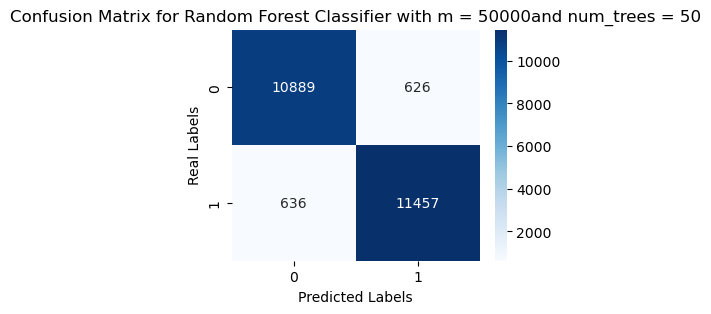

In [11]:
from sklearn.ensemble import RandomForestClassifier

j = 50
# classifier
rf_classifier = RandomForestClassifier(n_estimators=j)
rf_classifier.fit(training_features[4], training_labels)

# predictor
yrf = rf_classifier.predict(vali_features[4])

# print classification report
print(f'm = {m[4]} and num_trees = {j}')
print(classification_report(vali_labels, yrf))

# print confusion matrix
plt.figure(figsize = (4,3))

sns.heatmap(confusion_matrix(vali_labels,yrf), annot=True, 
            fmt='', cmap='Blues')

plt.title('Confusion Matrix for Random Forest Classifier with m = ' + str(m[4]) + 'and num_trees = ' + str(j))
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')
